# Section I. Root Finding

## Problem 1.

In [65]:
f(x) = exp(x - sqrt(x)) - x

f_prime(x) = (1 - 1/(2*sqrt(x))) * exp(x-sqrt(x)) - 1
;

In [66]:
function newton(f, f_prime, init, iter)
    x = zeros(iter)
    x[1] = init

    for i ∈ 2:iter
        x[i] = x[i-1] - ( f(x[i-1]) / f_prime(x[i-1]) )
    end

    return x
end

newton (generic function with 1 method)

In [67]:
x_ls = newton(f, f_prime, 0.01, 5)
;

In [68]:
function make_newton_plot_array(f, x_ls)
    plot_x = collect(Iterators.flatten(repeat(x_ls, inner=2))) # from [1,2,3] makes [1,1,2,2,3,3]
    plot_y = zeros(length(plot_x))
    for i in 1:length(plot_x)
        if i % 2 == 0
            plot_y[i] = 0
        else
            plot_y[i] = f(plot_x[i])
        end
    end
    return plot_x, plot_y
end

make_newton_plot_array (generic function with 1 method)

In [69]:
newton_x, newton_y = make_newton_plot_array(f, x_ls)
;

In [70]:
using Plots

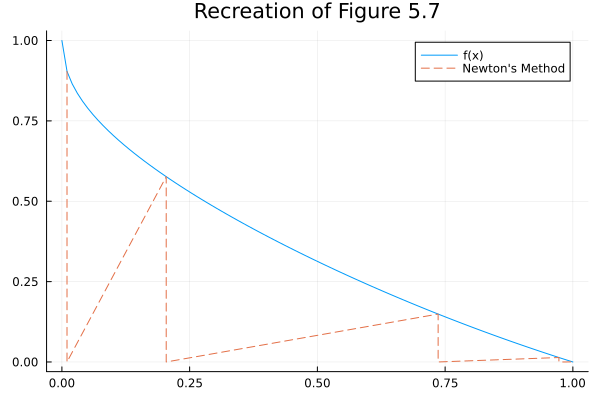

In [71]:
plot_range = range(0, 1, length=100)
plot(plot_range,f.(plot_range), label = "f(x)")
plot!(newton_x, newton_y, style=:dash, label = "Newton's Method")
title!("Recreation of Figure 5.7")

## Problem 2

In [72]:
a = 1
u(x) = f(x) / (x-a)
u_prime(x) = -(exp(x - sqrt(x)) - x)/(x-a)^2 + ((1 - 1/(2*sqrt(x)))*exp(x-sqrt(x)) - 1)/(x-a)
;

In [82]:
x_ls_u = newton(u, u_prime, 0.01, 10)
;

In [83]:
nuwton_x, nuwton_y = make_newton_plot_array(u, x_ls_u)
;

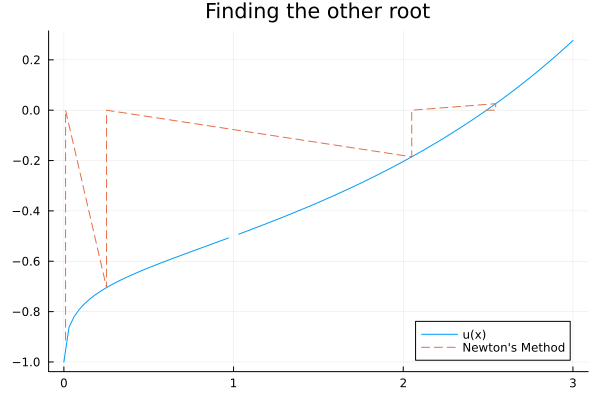

In [84]:
plot_range_u = range(0, 3, length=100)
plot(plot_range_u,u.(plot_range_u), label = "u(x)")
plot!(nuwton_x, nuwton_y, style=:dash, label = "Newton's Method")
title!("Finding the other root")

## Problem 3.

In [93]:
# The given function had -4xe^x and +4xe^x so I cancelled those out
f(x) = -x^5 + 4x^4 - 4x^3 + x^2*exp(x) - 2x^2 + 8x - 8

f (generic function with 1 method)

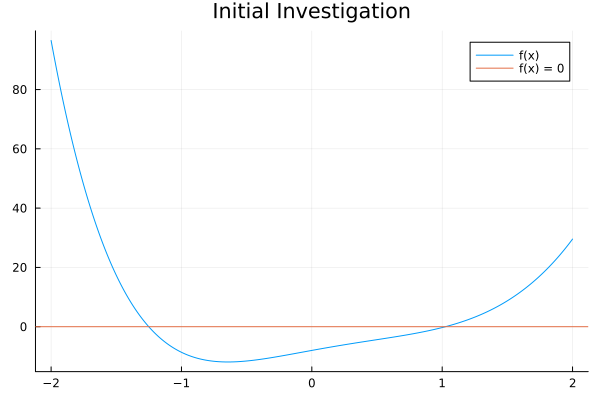

In [105]:
plot_range = range(-2, 2, length=1000)
plot(plot_range,f.(plot_range), label = "f(x)")
hline!([0], label = "f(x) = 0")
title!("Initial Investigation")

This gives us initial guesses to the roots, one near $x=-1.2$ and one near $x=1$. We'll use Bisection to find the exact values.

In [106]:
function bisection(f, a, b, tolerance)
    # check if there is a sign change between a and b
    if sign(f(a)) == sign(f(b))
        error("The scalars a and b do not bound a root")
    end

    # find midpoint
    c = (a + b) / 2

    # check if c is within tolerance
    if abs(f(c)) < tolerance
        return c
    elseif sign(f(a)) == sign(f(c))
        return bisection(f, c, b, tolerance)
    elseif sign(f(b)) == sign(f(c))
        return bisection(f, a, c, tolerance)
    end
end

bisection (generic function with 1 method)

In [114]:
x1 = bisection(f, -1.5, -1, 1e-10)
x2 = bisection(f, 0, 2, 1e-10)

print("First root: ", x1)
print("\nSecond root: ", x2)

First root: -1.2509578321150912
Second root: 1.024723170863581

Then we'll check with Julia's Roots.jl package:

In [119]:
# run once to add to environment, very slow if run again.
#using Pkg
#Pkg.add("Roots")

using Roots
x1_builtin = find_zero(f, -1)
x2_builtin = find_zero(f, 1)

print("First root: ", x1_builtin)
print("\nSecond root: ", x2_builtin)

First root: -1.2509578321155321
Second root: 1.0247231708612046

# Section II. Interpolation

## Problem 4.

In [124]:
xs = [0,1,2,3,4]
ys = [2,1,3,5,1]
;

In [194]:
function lerp(x_arr, y_arr, x_eval)
    slope_arr = zeros(length(x_arr) - 1)
    for i in 1:length(x_arr) - 1
        rise = y_arr[i+1] - y_arr[i]
        run = x_arr[i+1] - x_arr[i]

        slope_arr[i] = rise / run
    end
    
    y_eval = zeros(length(x_eval))
    for j in 1:length(x_eval)
        for i in 1:length(x_arr) - 1
            diff = x_eval[j] - x_arr[i]
            if diff < 1
                y_eval[j] = y_arr[i] + slope_arr[i]  * diff
                break
            end
        end
    end
    return y_eval
end

lerp (generic function with 1 method)

In [197]:
x_new = range(0, 4, 50)
y_new = lerp(xs, ys, x_new)
;

In [198]:
using Pkg
Pkg.add("Interpolations")

   Resolving package versions...
    Updating `C:\Users\Joseph\.julia\environments\v1.11\Project.toml`
⌅ [a98d9a8b] + Interpolations v0.15.1
  No Changes to `C:\Users\Joseph\.julia\environments\v1.11\Manifest.toml`


In [202]:
using Interpolations
interp_linear = linear_interpolation(xs, ys);

y_lerped = interp_linear(x_new);

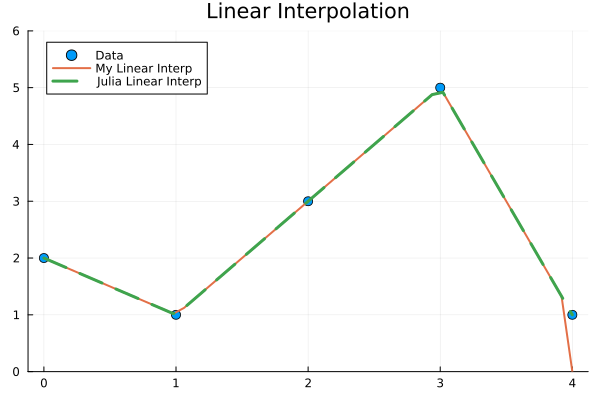

In [ ]:
scatter(xs, ys, label = "Data", markersize = 5)
plot!(x_new, y_new, label = "My Linear Interp", linewidth = 2)
plot!(x_new, y_lerped, label = "Julia Linear Interp", style=:dash, linewidth = 3)
ylims!(0,6)
title!("Linear Interpolation")

## Problem 5.

In [327]:
x = [1,2,3]
y = log.(x)
;

In [328]:
A = [1 1 1 1  0   0   0   0;
    8 4 2 1  0   0   0   0;
    0   0   0   0  8 4 2 1;
    0   0   0   0  27 9 3 1;
    12 4 1 0  -12 -4 -1 0;
    12   2   0 0  -12   -2   0 0;
    6   2   0 0   0      0   0 0;
    0     0   0 0   18   2   0 0
]
b = [y[1] y[2] y[2] y[3] 0 0 0 0];

In [329]:
coeffs = A \ b';
coeffs1 = coeffs[1:4]
coeffs2 = coeffs[5:8]
;

In [330]:
function splinify(x, coeffs)
    a, b, c, d = coeffs
    return a .* x.^3 .+ b .* x.^2 .+ c .* x .+ d
end

splinify (generic function with 1 method)

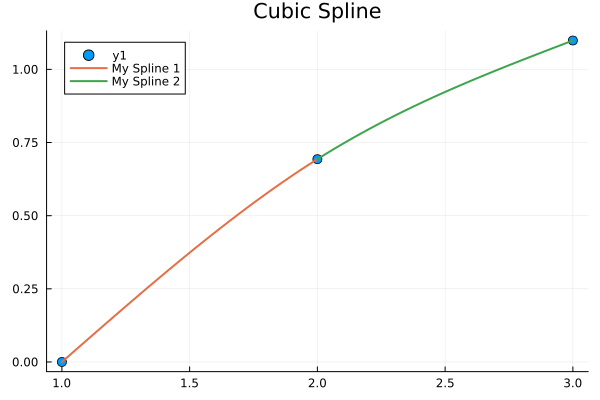

In [331]:
range1 = range(1,2,30)
range2 = range(2,3,30)
scatter(x,y,markersize=5)
plot!(range1, splinify(range1, coeffs1), label="My Spline 1", linewidth = 2)
plot!(range2, splinify(range2, coeffs2), label="My Spline 2", linewidth = 2)
title!("Cubic Spline")

I, for the life of me, could not find a decent easy cubic spline implementation in any decently reputable Julia package. The closest I got was from (unsurprisingly) CubicSplines.jl, but there was like zero documentation and the only method they had was called Akima something or other, and it required 5 datapoints when we only have 3. So I'm just going to sort of move on...

## Problem 6.

In [338]:
x = [1.0, 2.0, 3.0, 4.0, 5.0]
y = [100.0, 25.0, 11.111, 6.25, 4.0]
;

In [353]:
function divided_diff(x, y)
    n = length(y)
    coef = zeros(Float64, n, n)
    coef[:, 1] .= y  # first column is y
    for j in 2:n
        for i in 1:(n - j + 1)
            coef[i, j] = (coef[i+1, j-1] - coef[i, j-1]) / (x[i+j-1] - x[i])
        end
    end
    return coef
end

function newton_poly(coef, x_data, x)
    n = length(x_data) - 1
    p = coef[1, n+1]
    for k in 1:n
        p = coef[1, n+1-k] + (x - x_data[n+1-k]) * p
    end
    return p
end;

In [394]:
# now that we have more than 3 datapoints we can actually use the CubicSplines.jl package.
using CubicSplines

# extrapolating a cubic spline requires some coefficients on the polynomial it continues on with;
# we just take the slope between the last two datapoints and continue with that
slope = y[5] - y[4] / (x[5] - x[4])
spline = CubicSpline(x, y, extrapr=[slope,]);

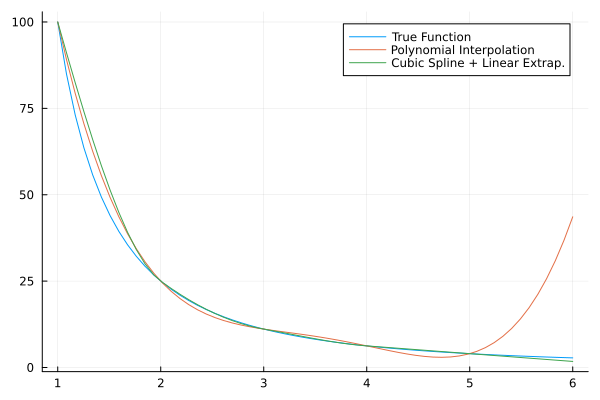

In [388]:
coeffs = divided_diff(x,y)
x_range = range(1,6,60);

plot(x_range, 100 ./ x_range.^2, label="True Function")
plot!(x_range, newton_poly.(Ref(coeffs), Ref(x), x_range), label="Polynomial Interpolation")
plot!(x_range, spline.(x_range), label="Cubic Spline + Linear Extrap.")

As for the actual function values:

In [397]:
true_val = 100/5.7^2
poly_val = newton_poly(coeffs, x, 5.7)
spline_val = spline(5.7)

println("True: ", true_val)
println("Polynomial: ", poly_val)
println("Cubic Plus: ", spline_val)

True: 3.077870113881194
Polynomial: 23.16232377500006
Cubic Plus: 2.425


In [406]:
function pct_error(tr, ex, str)
    error = 100 * abs(tr - ex) / tr
    error = round(error; digits=3)
    println(str, " % Error: ", error)
end

pct_error (generic function with 1 method)

In [407]:
pct_error(true_val, poly_val, "Polynomial")
pct_error(true_val, spline_val, "Cubic Spline")

Polynomial % Error: 652.544
Cubic Spline % Error: 21.212


# Section III. Least Squares

In [423]:
Pkg.add("LsqFit")

   Resolving package versions...
   Installed LsqFit ─ v0.15.1
    Updating `C:\Users\Joseph\.julia\environments\v1.11\Project.toml`
  [2fda8390] + LsqFit v0.15.1
    Updating `C:\Users\Joseph\.julia\environments\v1.11\Manifest.toml`
  [2fda8390] + LsqFit v0.15.1
Precompiling project...
  18982.8 ms  ✓ LsqFit
  1 dependency successfully precompiled in 205 seconds. 656 already precompiled.


In [424]:
using LsqFit

## Problem 7.

In [429]:
x = [2.1, 6.2, 7.2, 10.5, 13.7]
y = [2.90, 3.83, 5.98, 5.71, 7.74]
;

$$ y_i = a + bx_i $$

Looking for $\vec{\alpha} = \begin{bmatrix} a \\ b\end{bmatrix}$ by minimizing $ |\mathsf{A}\vec{\alpha} - \vec{y}|^2$ where $\mathsf{A} = \begin{bmatrix} \vec{1} & \vec{x}\end{bmatrix}$ for column vectors $\vec{x}$ and $\vec{1}$ (same length as $\vec{x}$).

The solution is $\alpha = (\mathsf{A}^{\top}\mathsf{A})^{-1}\mathsf{A}^\top\vec{y}$

In [415]:
A = [ones(length(x)) x]

5×2 Matrix{Float64}:
 1.0   2.1
 1.0   6.2
 1.0   7.2
 1.0  10.5
 1.0  13.7

In [416]:
params = inv(A'A) * A' * y

2-element Vector{Float64}:
 2.034481217382318
 0.40271017413320864

Now onto the LsqFit.jl package

In [437]:
model(x, p) = p[1] .+ p[2] .* x
p0 = [1.0,1.0]

fit = curve_fit(model, x, y, p0)

jl_params = coef(fit)

2-element Vector{Float64}:
 2.0344812174265923
 0.40271017412858295

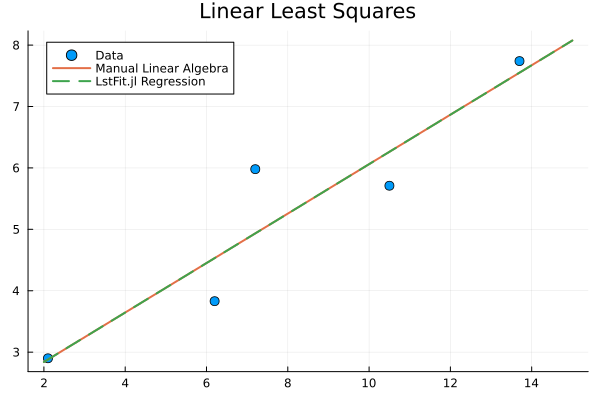

In [445]:
x_range = range(2, 15, 60)
scatter(x,y,markersize=5, label="Data")
plot!(x_range, params[1] .+ params[2] .* x_range, label="Manual Linear Algebra", linewidth = 2)
plot!(x_range, jl_params[1] .+ jl_params[2] .* x_range, label="LstFit.jl Regression", style=:dash, linewidth = 2)
title!("Linear Least Squares")

## Problem 8.

In [448]:
x = [-4, -2, -1, 0, 1, 3, 4, 6]
y = [-35.1, 15.1, 15.9, 8.9, 0.1, 0.1, 21.1, 135]
;

In [457]:
@. model2(x, p) = p[1] + p[2] * x + p[3] * x^2 + p[4] * x^3
p0 = [1.0,1.0,1.0,1.0]

fit = curve_fit(model2, x, y, p0)

jl_params = coef(fit)

4-element Vector{Float64}:
  9.011043860710622
 -8.966143193091387
 -1.0000940797702182
  0.9990742982420612

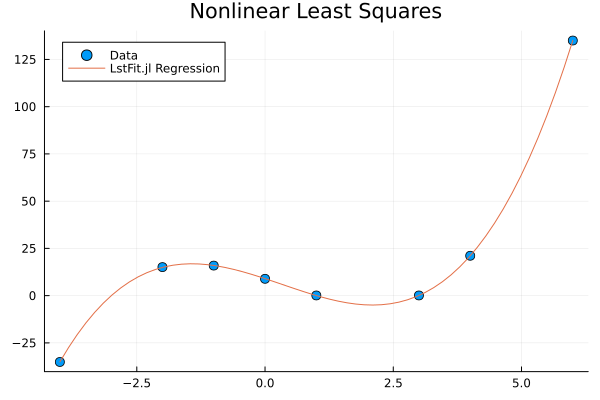

In [459]:
x_range = range(-4, 6, 60)
scatter(x,y,markersize=5, label="Data")
plot!(x_range, model2(x_range, jl_params), label="LstFit.jl Regression")
title!("Nonlinear Least Squares")

## Problem 9.

In [525]:
h(t, a, b)  = a .* t ./ (b .+ t)

h (generic function with 2 methods)

In [464]:
t = [0.038, 0.194, 0.425, 0.626, 1.253, 2.500, 3.740]
y = [0.050, 0.127, 0.094, 0.2122, 0.2729, 0.2665, 0.3317]
;

For Newton-Gauss, we need to build the Jacobian matrix, whose entries are partial derivatives of the model function with respect to the parameters:

$$ \mathbf{J}_{ij} = \left\{\frac{\partial h_i}{\partial p_j}\right\}$$

Where $h_i = h(t_i; a,b)$ and $\mathbf{p} = \begin{bmatrix}a \\ b \end{bmatrix}$. With the two parameters we have and the known model function, we can find the derivatives explicitly:

\begin{align*}
    \frac{\partial h_i}{\partial a} = \frac{t_i}{b + t_i} \\
    \frac{\partial h_i}{\partial b} = \frac{-at_i}{(b + t_i)^2}
\end{align*}
With our 7 datapoints, this will build us a 7 x 2 matrix for the Jacobian.

In [526]:
function jacobian(t, a, b)
    J = zeros(length(t), 2)
    J[:, 1] = t ./ (b .+ t)
    J[:, 2] = -a .* t ./ (b .+ t).^2

    return J
end

jacobian (generic function with 1 method)

In [495]:
using LinearAlgebra

In [540]:
function newton_gauss_method(t, y, p0 = [1.0,1.0], tol = 1e-6, max_iter = 200)
    p = copy(p0)
    for k in 1:max_iter
        a, b = p
        r = y .- h(t, a, b)
        J = jacobian(t, a, b)

        A = J'J
        B = J'r

        Δp = A \ B

        p_new = p .+ Δp

        if norm(Δp) < tol
            println("Converged after $k iterations")
            return p_new
        end
        
        p = p_new
    end

    println("Did not converge within $max_iter iterations")
    return p
end

newton_gauss_method (generic function with 4 methods)

In [541]:
params = newton_gauss_method(t, y)

Converged after 8 iterations


2-element Vector{Float64}:
 0.3618368696196717
 0.5562664434845762

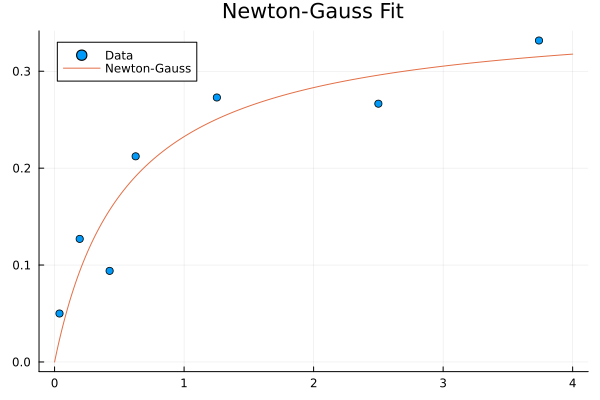

In [542]:
x_range = range(0, 4, 400)
scatter(t,y, label="Data")
plot!(x_range, h(x_range, params[1], params[2]), label="Newton-Gauss")
title!("Newton-Gauss Fit")

In [543]:
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `C:\Users\Joseph\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Joseph\.julia\environments\v1.11\Manifest.toml`


In [551]:
using Statistics
σ = 0.03 .* y
χ2 = sum(((y .- h(t, params[1], params[2])) ./ σ).^2)
println("χ² = ", χ2)

χ² = 926.6737352340584


This is a rather humongous $\chi^2$, but our y-values range from 0 to 0.3ish, so all of our $\sigma$ values are less than $0.01$. Thus, it sorta makes sense that it would blow up like that.